<a href="https://colab.research.google.com/github/RomanGustavo/Mestrado---ML/blob/main/codigo_aula22_classificacao_desbalanceada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação desbalanceada

Esse notebook é uma tradução e adaptação do exemplo apresentado [no site do Keras](https://keras.io/examples/structured_data/imbalanced_classification/), criado por [fchollet](https://twitter.com/fchollet), e que utiliza essa base de dados do Kaggle [aqui](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).


## Introdução

Este exemplo mostra como treinar um modelo classificador quando os dados são altamente desbalanceados. O objetivo é treinar uma rede neural capaz de identificar operações financeiras fraudulentas.

## Vetorizando os dados CSV

In [6]:
import csv
import numpy as np

fname = "creditcard.csv"

todas_caracteristicas = []
todos_rotulos         = []

with open(fname, newline='') as f:
    reader = csv.reader(f)
    header = next(reader)  # pula o cabeçalho
    print("CABECALHO:", ",".join(header))

    for i, fields in enumerate(reader):
        # converte todas as colunas, exceto a última, para float
        todas_caracteristicas.append([float(v) for v in fields[:-1]])
        # última coluna (Class) -> int
        todos_rotulos.append([int(fields[-1])])

        if i == 0:
            print("CARACTERISTICAS:", todas_caracteristicas[-1])

caracteristicas = np.array(todas_caracteristicas, dtype="float32")
valores_alvo    = np.array(todos_rotulos, dtype="uint8")
print("caracteristicas.shape:", caracteristicas.shape)
print("valores_alvo.shape:", valores_alvo.shape)


CABECALHO: Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
CARACTERISTICAS: [0.0, -1.3598071336738, -0.0727811733098497, 2.53634673796914, 1.37815522427443, -0.338320769942518, 0.462387777762292, 0.239598554061257, 0.0986979012610507, 0.363786969611213, 0.0907941719789316, -0.551599533260813, -0.617800855762348, -0.991389847235408, -0.311169353699879, 1.46817697209427, -0.470400525259478, 0.207971241929242, 0.0257905801985591, 0.403992960255733, 0.251412098239705, -0.018306777944153, 0.277837575558899, -0.110473910188767, 0.0669280749146731, 0.128539358273528, -0.189114843888824, 0.133558376740387, -0.0210530534538215, 149.62]
caracteristicas.shape: (284807, 30)
valores_alvo.shape: (284807, 1)


## Preparando os dados

In [7]:
num_amostras_validacao = int(len(caracteristicas) * 0.2) # deixaremos 20% dos dados para validação
X_trein = caracteristicas[:-num_amostras_validacao]
y_trein = valores_alvo[:-num_amostras_validacao]
X_val   = caracteristicas[-num_amostras_validacao:]
y_val   = valores_alvo[-num_amostras_validacao:]

print("Número de amostras de treinamento:", len(X_trein))
print("Número de amostras de validação:", len(X_val))

Número de amostras de treinamento: 227846
Número de amostras de validação: 56961


## Análise do desbalanceamento nos rótulos e atribuição de pesos diferentes

In [8]:
qtdade_amostras_cada_classe = np.bincount(y_trein[:, 0]) # função do numpy que conta a quantidade de amostras para cada classe
print(qtdade_amostras_cada_classe)
print(
    "Número de amostras positivas no conjunto de dados: {} ({:.2f}% do total)".format(
        qtdade_amostras_cada_classe[1], 100 * float(qtdade_amostras_cada_classe[1]) / len(y_trein)
    )
)

peso_classe_0 = 1.0 / qtdade_amostras_cada_classe[0]
peso_classe_1 = 1.0 / qtdade_amostras_cada_classe[1]

print("Peso para classe 0:", peso_classe_0 )
print("Peso para classe 1:", peso_classe_1 )

pesos_classes = {0: peso_classe_0, 1: peso_classe_1} # cria um dicionário com o peso de cada classe

[227429    417]
Número de amostras positivas no conjunto de dados: 417 (0.18% do total)
Peso para classe 0: 4.396976638863118e-06
Peso para classe 1: 0.002398081534772182


## Normalizando os dados usando média e desvio padrão

In [9]:
media    = np.mean(X_trein, axis=0)
X_trein -= media
X_val   -= media
desvio   = np.std(X_trein, axis=0)
X_trein /= desvio
X_val   /= desvio

## Criando uma rede neural para classificação binária

In [10]:
import keras

modelo = keras.Sequential(
    [
        keras.Input(shape=X_trein.shape[1:]),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139,777 (546.00 KB)

 Trainable params: 139,777 (546.00 KB)

 Non-trainable params: 0 (0.00 B)

## Treinando o modelo levando em conta o desbalaceamento entre as classes

In [11]:
modelo.compile(optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy")

modelo.fit(
    X_trein,
    y_trein,
    batch_size=2048, # define a quantidade de amostras de cada "mini-lote" (se comentarmos essa linha, será usado o padrão de 32 amostras por mini-lote)
    epochs=30,
    class_weight=pesos_classes,
)

Epoch 1/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 3.6929e-06
Epoch 2/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5038e-06
Epoch 3/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1786e-06
Epoch 4/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1769e-06
Epoch 5/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.3949e-07
Epoch 6/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1322e-06
Epoch 7/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.6922e-07
Epoch 8/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.7042e-07
Epoch 9/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2708e-07
Epoch 10/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4659e-07
Epoch 11/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.8151e-07
Epoch 12/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.4722e-07
Epoch 13/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.0229e-07
Epoch 14/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.8840e-07


In [12]:
probabilidades = modelo.predict(X_val) # cálculo da saída da rede neural para as transações de validação

print(probabilidades.shape) # verificando o shape das probabilidades

print(probabilidades[:10]) # verificando as probabilidades das primeiras 10 amostras de validação

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
(56961, 1)
[[7.4407006e-16]
 [2.3972250e-18]
 [4.0039189e-19]
 [3.0602817e-03]
 [3.4369487e-02]
 [3.2077162e-06]
 [1.9039788e-04]
 [2.6037591e-20]
 [5.2903482e-04]
 [2.8352093e-12]]


In [13]:
y_val_est = (probabilidades >= 0.5).astype(int)

print(y_val_est.shape)
print(y_val_est[:10]) # mostrado a classe prevista para as primeiras 1 amostras de validação

(56961, 1)
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


## Plotando matriz de confusão para os dados de validação

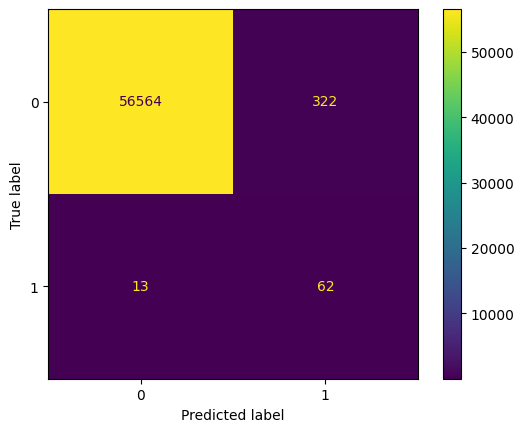

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val, y_val_est) # cm = confusion matrix = matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()


A partir da matriz de confusão, gerada para as transações de validação, podemos perceber que (os valores abaixo podem variar ligeiramente devido à inicialização aleatória dos pesos da rede neural):

- 56961 transações de validação foram avalidadas pela rede neural
- 66 transações foram corretamente identificadas como fraudulentas
- 8 transações fraudulentas não foram detectadas
- Infelizmente, 441 transações não fraudulentas foram incorretamente classificadas como fraudulentas.


In [15]:
# calculando precisão, recall e f1 score

rotulos = ["y=0","y=1"]

tp        = np.diag(cm) # Diagonal represents true positives
precisao  = dict()
revocacao = dict()
f1_score  = dict()
for i in range(len(rotulos)):
  col = cm[:, i]
  fp = np.sum(col) - tp[i] # Sum of column minus true positive is false negative

  row = cm[i, :]
  fn = np.sum(row) - tp[i] # Sum of row minus true positive, is false negative

  valor_precisao  = tp[i] / (tp[i] + fp)
  valor_revocacao = tp[i] / (tp[i] + fn)
  valor_f1_score  = 2*valor_precisao*valor_revocacao / (valor_precisao + valor_revocacao)

  precisao[rotulos[i]] = valor_precisao
  revocacao[rotulos[i]]    = valor_revocacao
  f1_score[rotulos[i]]  = valor_f1_score

print("precisao: ", precisao)

print("recall: ", revocacao)

print("F1 score: ", f1_score)

precisao:  {'y=0': np.float64(0.9997702246495926), 'y=1': np.float64(0.16145833333333334)}
recall:  {'y=0': np.float64(0.9943395563055937), 'y=1': np.float64(0.8266666666666667)}
F1 score:  {'y=0': np.float64(0.997047495659378), 'y=1': np.float64(0.2701525054466231)}


Note que existe um valor de precisão, revocação e f1 score para cada classe. Nos nossos slides, tais valores foram calculados tomando-se a classe $y=1$ como referência. Emtretanto, nada impede que essas 3 métricas sejam calculadas tomando-se a classe $y=0$ como referência. Imagine, por exemplo, se tivéssemos usado o rótulo $y=0$ para operações fraudulentas, e $y=1$ para operações não fraudulentas. Nesse caso, faria mais sentido observar tais métricas tomando-se o $y=0$ como referência.


Nos valores calculados observamos que, tomando os valores referentes à classe $y=1$ como referência (operações fraudulentas), o valor de precisão é relativamente baixo (mesma conclusão a qual já havíamos chegado nos nossos slides). Apesar disso, observando a matriz de confusão nós notamos que trata-se de um bom modelo para a aplicação em tela.

## Parabéns

Parabéns, você criou uma rede neural capaz de identificar operações financeiras fraudulentas.